In [1]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

import bayes_opt.visualization.visualization_utility_cost as viz
from bayes_opt.test_functions import drl_experiments
from bayes_opt.utility.basic_utility_functions import evaluating_final_util_MaxEpoch
from tqdm import tqdm
from bayes_opt.sequentialBO.boil import BOIL
from bayes_opt.curve_compression import return_logistic_curve

import warnings
warnings.filterwarnings("ignore")

W1115 17:27:30.486617 20352 deprecation.py:323] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


# Initialize the tuning hyperparameters and DDQN algorithm

In [2]:
SearchSpace = OrderedDict([('gamma',(0.8,1)), ('maxEpisodes',(200, 500))])

varParams = list(SearchSpace.keys())
fixedParams = OrderedDict([
        ("DDQN", True),
        ("Duelling", True),
        ("buffer_size", 5000),
        ("batch_sz", 64),
        ("maxSteps", 200),
        ("PER", 0),
        ("alpha", 1.0),
        ("update_rate", 1),
        ("architecture", [50,50]),
        ("maxExp", 10000),
        ("eps_0", 1.0),
        ("eps_final", 0.05),
        ("beta_time", 1000),
        ("beta_0", 0.6),
        ("beta_final", 1.0)])

# Initialize the CartPole-v0 environment to be run with DQN
myfunction=drl_experiments.DRL_experiment("DQN", "CartPole-v0", varParams, fixedParams, SearchSpace)

# Initializing BOIL


In [3]:
acq_name='ei_mu_max' # selecting the acquisition function ['ei', 'ucb', 'ei_mu_max']

func_params={}
func_params['function']=myfunction

boil=BOIL(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

# Initialize with 2 observations randomly

In [4]:
print("initializing with 2 points - please wait...")
boil.init(n_init_points=2)

print("done initialization")

initializing with 2 points - please wait...
Max #augmented points 10 	 #augmented points  8 	 Augmented points:  [0.    0.115 0.195 0.354 0.5   0.632 0.769 0.887]
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
done initialization


# Run one iteration and plot the GP surrogate and acquisition function

ln of conditioning number of GP covariance matrix 11.1
selected point from acq func: [1.     0.1443] acq val=log(Utility/Cost)= -0.9158
Max #augmented points 1 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[1.] t=243 current y=11.34, ybest=120.84


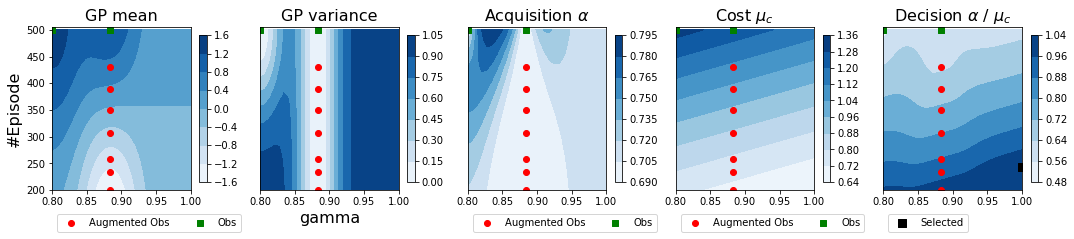

In [5]:
# Suggest the next experiment
boil.suggest_nextpoint()

# plot the acquisition function
viz.plot_bo_2d_cost_utility_AF(boil)


# We run further 10 iterations

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

ln of conditioning number of GP covariance matrix 11.1
selected point from acq func: [0. 0.] acq val=log(Utility/Cost)= -0.8645
[original scale] x=[0.8] t=200 current y=12.56, ybest=120.84


 10%|████████▎                                                                          | 1/10 [00:50<07:38, 50.95s/it]

ln of conditioning number of GP covariance matrix 11.1
==estimated lengthscale_x=0.5000 lengthscale_t=0.090 Logistic midpoint=1.8 Logistic growth=1.4
selected point from acq func: [0.     0.2785] acq val=log(Utility/Cost)= -0.7014
Max #augmented points 2 	 #augmented points  2 	 Augmented points:  [0.061 0.139]
[original scale] x=[0.8] t=242 current y=2.31, ybest=120.84


 20%|████████████████▌                                                                  | 2/10 [02:35<08:57, 67.17s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [0.9755 0.5972] acq val=log(Utility/Cost)= -2.6032
Max #augmented points 5 	 #augmented points  5 	 Augmented points:  [0.    0.084 0.24  0.372 0.496]
[original scale] x=[0.9951] t=349 current y=4.01, ybest=120.84


 30%|████████████████████████▉                                                          | 3/10 [03:14<06:49, 58.44s/it]

ln of conditioning number of GP covariance matrix 10.0
selected point from acq func: [0.1649 1.    ] acq val=log(Utility/Cost)= -3.1445
Max #augmented points 10 	 #augmented points  10 	 Augmented points:  [0.    0.13  0.276 0.398 0.507 0.594 0.687 0.783 0.865 0.944]
[original scale] x=[0.833] t=483 current y=101.00, ybest=120.84


 40%|████████████████████████████████▊                                                 | 4/10 [06:35<10:08, 101.39s/it]

ln of conditioning number of GP covariance matrix 11.5
==estimated lengthscale_x=0.2815 lengthscale_t=0.101 Logistic midpoint=1.9 Logistic growth=1.1
selected point from acq func: [1. 1.] acq val=log(Utility/Cost)= -2.9584
Max #augmented points 10 	 #augmented points  10 	 Augmented points:  [0.    0.053 0.221 0.323 0.491 0.59  0.69  0.776 0.851 0.938]
[original scale] x=[1.] t=482 current y=7.44, ybest=120.84


 50%|█████████████████████████████████████████▌                                         | 5/10 [07:10<06:47, 81.52s/it]

ln of conditioning number of GP covariance matrix 11.5
selected point from acq func: [0.6506 0.8295] acq val=log(Utility/Cost)= -2.1089
Max #augmented points 8 	 #augmented points  8 	 Augmented points:  [0.    0.054 0.125 0.198 0.284 0.423 0.567 0.708]
[original scale] x=[0.9301] t=412 current y=77.08, ybest=120.84


 60%|█████████████████████████████████████████████████▏                                | 6/10 [10:11<07:24, 111.23s/it]

ln of conditioning number of GP covariance matrix 11.8
==estimated lengthscale_x=0.0050 lengthscale_t=0.145 Logistic midpoint=1.1 Logistic growth=1.8
selected point from acq func: [0.0139 0.6062] acq val=log(Utility/Cost)= -1.3164
Max #augmented points 6 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8028] t=382 current y=66.47, ybest=120.84


 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [12:44<06:11, 123.67s/it]

ln of conditioning number of GP covariance matrix 11.4
selected point from acq func: [0.0297 0.8733] acq val=log(Utility/Cost)= -1.7461
Max #augmented points 8 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8059] t=462 current y=95.31, ybest=120.84


 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [15:55<04:47, 143.97s/it]

ln of conditioning number of GP covariance matrix 11.4
selected point from acq func: [0.     0.8755] acq val=log(Utility/Cost)= -2.2738
Max #augmented points 8 	 #augmented points  6 	 Augmented points:  [0.    0.377 0.46  0.606 0.75  0.876]
[original scale] x=[0.8] t=463 current y=111.18, ybest=120.84


 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [19:14<02:40, 160.54s/it]

ln of conditioning number of GP covariance matrix 11.4
selected point from acq func: [0.9181 0.8953] acq val=log(Utility/Cost)= -1.9674
Max #augmented points 8 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9836] t=469 current y=112.49, ybest=120.84


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [21:38<00:00, 155.54s/it]


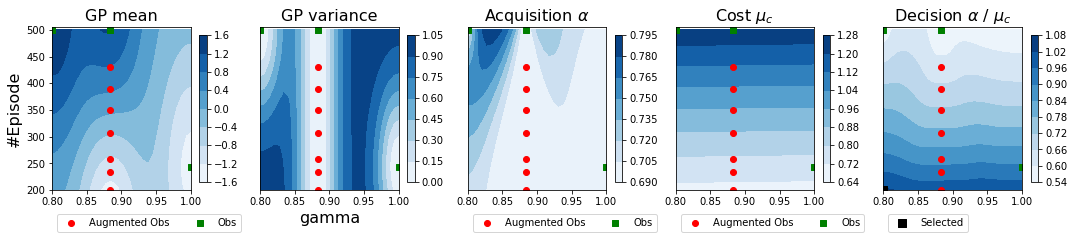

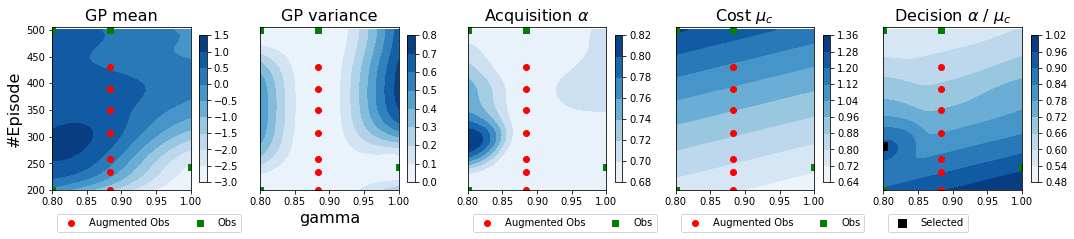

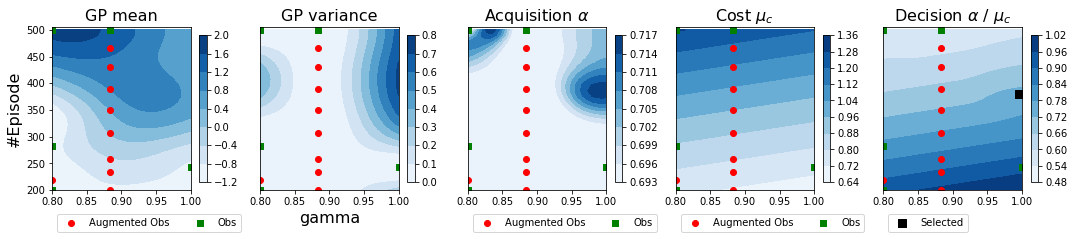

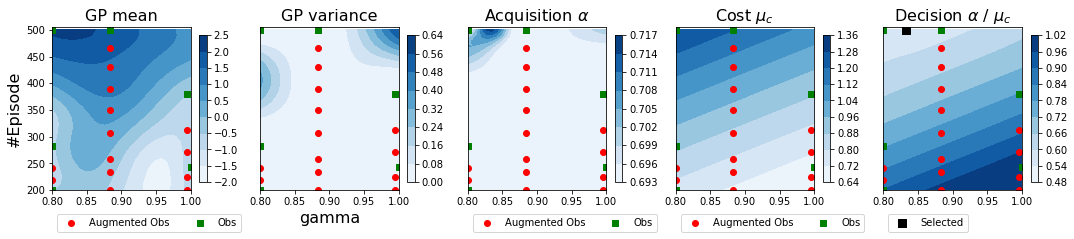

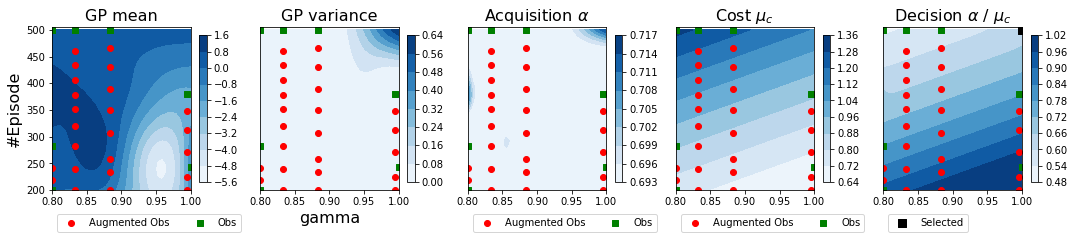

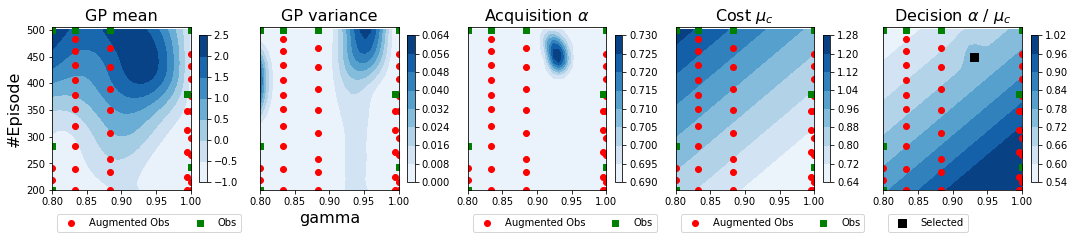

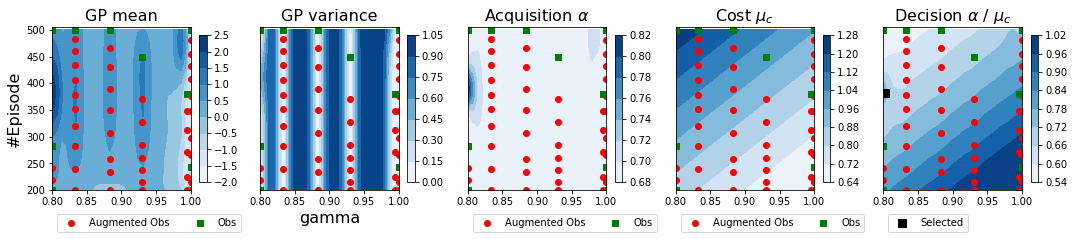

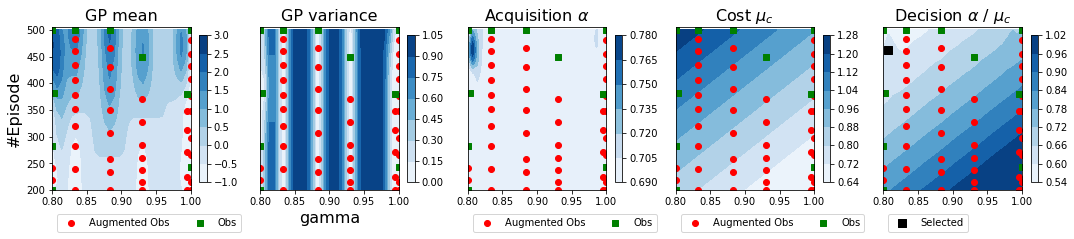

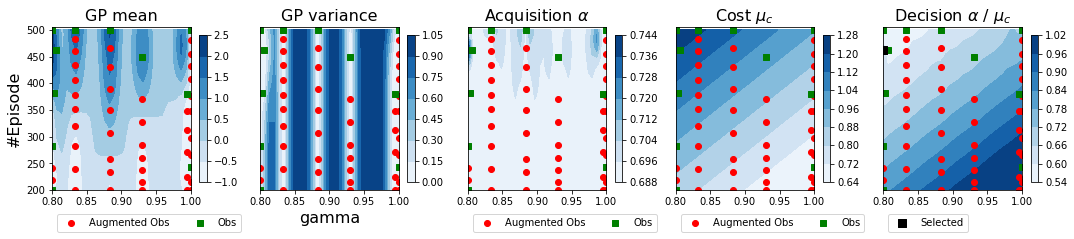

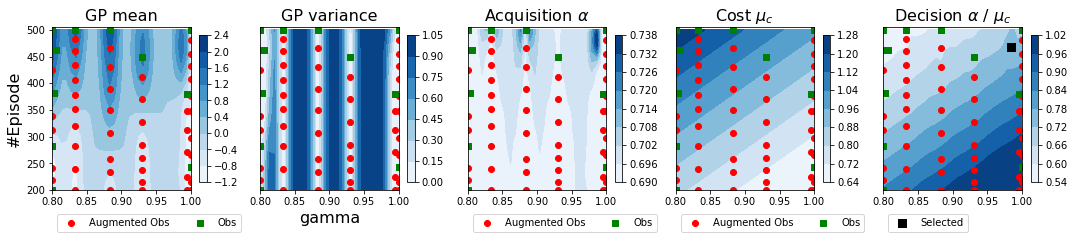

In [6]:
for ii in tqdm(range(10)):
    # Suggest the next experiment
    boil.suggest_nextpoint()

    # plot the acquisition function
    viz.plot_bo_2d_cost_utility_AF(boil)

# We evaluate the final performance score util MaxEpoch. The final utility score is marginalizing with different choices for the Logisic curve.

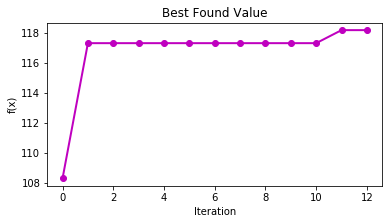

In [7]:
boil.Y_original=evaluating_final_util_MaxEpoch(boil)
viz.show_optimization_progress(boil)

# Select the optimal hyperparameter, run to Max Iteration, plot the found curve

Best found hyperparameter = [0.8]


Text(0.5, 1.0, 'Training curve of best found hyperparameter')

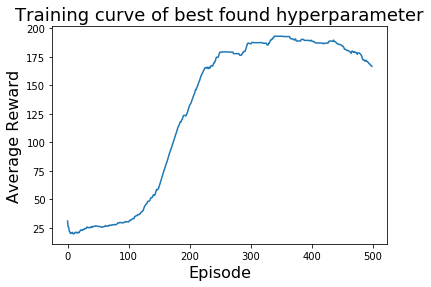

In [8]:
# select the optimal hyperparameter
idxMax=np.argmax(boil.Y_original)
print("Best found hyperparameter =",boil.X_original[idxMax])

# play the best parameter to Max Iteration
curve,time=myfunction.func(boil.X_original[idxMax])
curve=curve[0]
average100_curve=[np.mean( curve[max(0,n-100):n+1] )     for n in range(len(curve)) ]

# plot the found curve
fig=plt.figure()
plt.plot(average100_curve)
plt.xlabel('Episode',fontsize=16)
plt.ylabel('Average Reward',fontsize=16)
plt.title("Training curve of best found hyperparameter",fontsize=18)


# Plot  Natural log of Conditioning number of the GP covariance matrix

Text(0, 0.5, 'Ln of Cond Number of Cov Matrix')

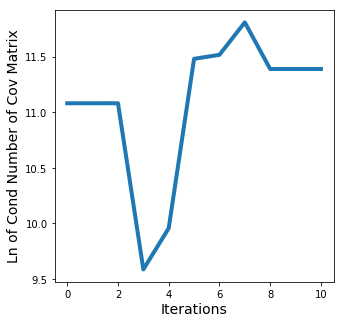

In [9]:
fig=plt.figure(figsize=(5,5))
plt.plot(np.log(boil.condition_number),linewidth=4)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Ln of Cond Number of Cov Matrix',fontsize=14)


# Plot the estimated preference function

Text(0.5, 1.0, 'Estimated Logistic Curve $m_0$=1.1 $g_0$=1.8')

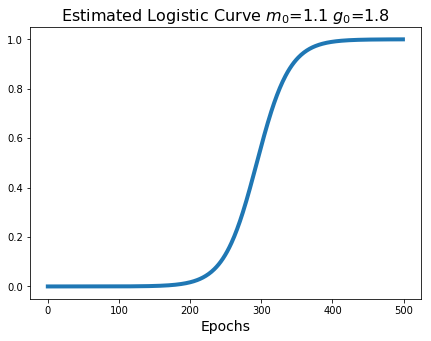

In [10]:
estimated_curve=return_logistic_curve(midpoint=boil.gp.logistic_hyper['midpoint'], 
                                      growth=boil.gp.logistic_hyper['growth'],
                                      MaxEpoch=SearchSpace['maxEpisodes'][1])

fig=plt.figure(figsize=(7,5))
plt.plot(estimated_curve,linewidth=4)
plt.xlabel('Epochs',fontsize=14)
plt.xlabel('Epochs',fontsize=14)

strTitle="Estimated Logistic Curve $m_0$={:.1f} $g_0$={:.1f}".format(boil.gp.logistic_hyper['midpoint'],boil.gp.logistic_hyper['growth'])
plt.title(strTitle,fontsize=16)